# Importing the libraries

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
movie = pd.read_csv("C:\\Users\\Dell\\Downloads\\archive (1)\\IMDb Movies India.csv", encoding='latin1')
print(movie.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [3]:
# shape of the data
movie.shape

(15509, 10)

In [4]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
movie.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [6]:
#column to list 
movie.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [7]:
movie.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
movie.nunique()

Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64

In [9]:
movie['Year'] = movie['Year'].str.extract(r'(\d{4})')  # Use raw string for regex
movie['Year'] = pd.to_numeric(movie['Year'], errors='coerce')

# Clean 'Duration' column
movie['Duration'] = movie['Duration'].str.replace(' min', '', regex=False).astype(float)

# Clean 'Votes' column
# Remove commas and other non-numeric characters
movie['Votes'] = movie['Votes'].str.replace(r'[^0-9]', '', regex=True).astype(float)

# Drop rows with invalid or missing values in key columns
movie = movie.dropna(subset=['Year', 'Duration', 'Votes', 'Rating'])


# Analysis and Visualization

# Count by Director (Top 10):

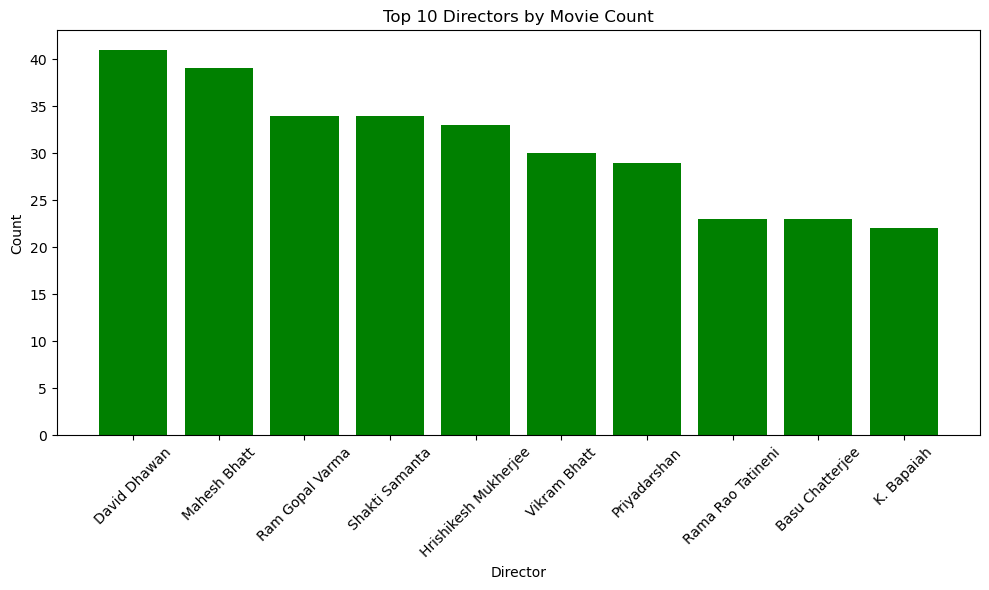

In [12]:
director_counts = movie['Director'].value_counts().head(10)  # Top 10 directors
plt.figure(figsize=(10, 6))
plt.bar(director_counts.index, director_counts, color='green')
plt.title('Top 10 Directors by Movie Count')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribution of movies over the years

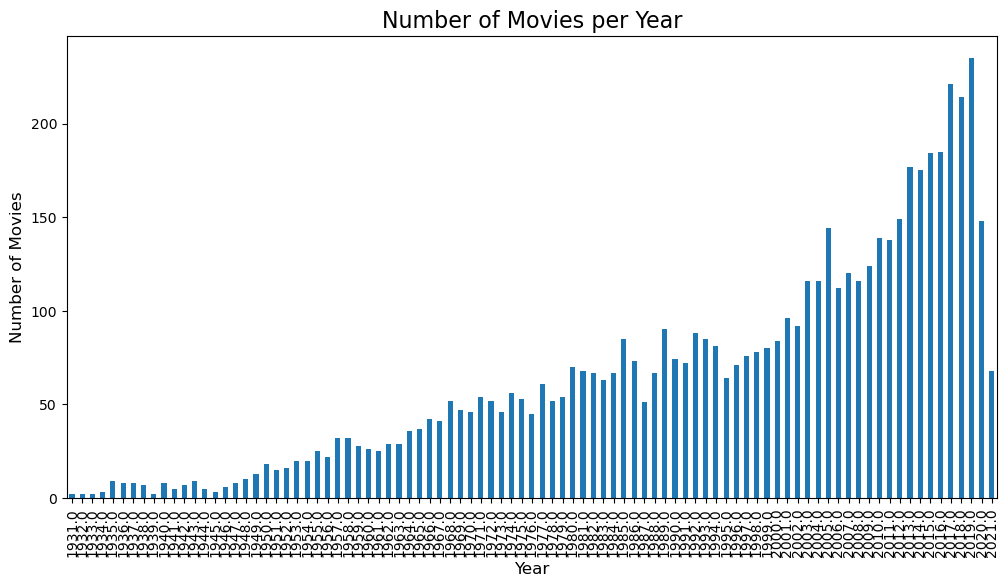

In [14]:
plt.figure(figsize=(12, 6))
movie['Year'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Movies per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.show()

# Most common genres

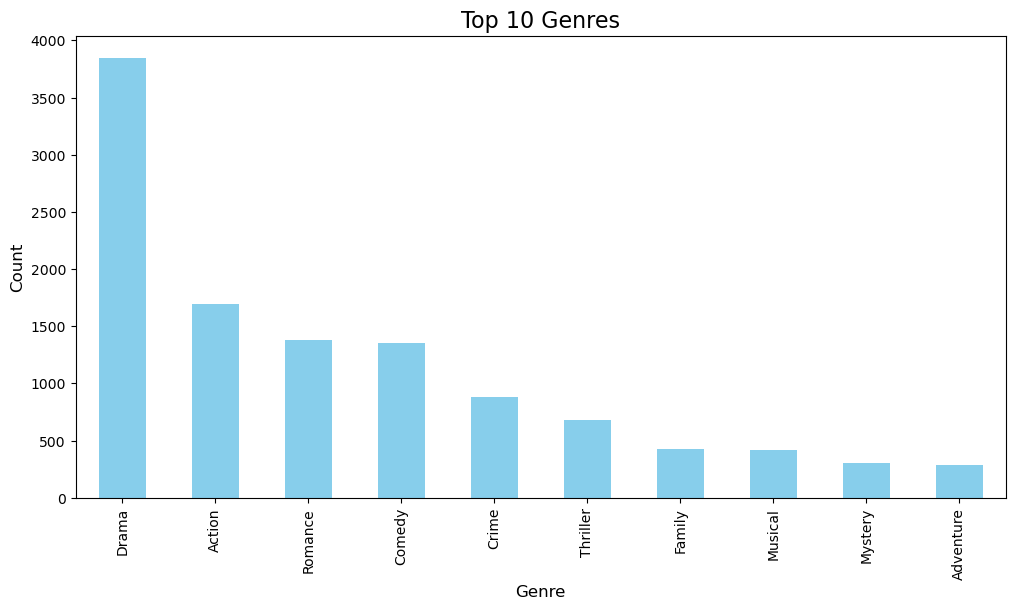

In [16]:
plt.figure(figsize=(12, 6))
movie['Genre'].dropna().str.split(', ').explode().value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# IMDb ratings distribution

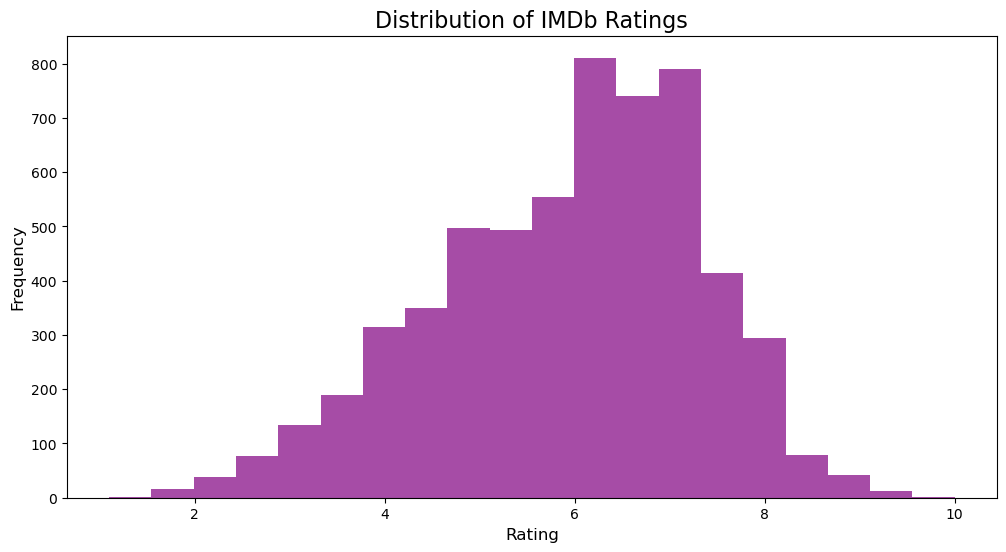

In [18]:
plt.figure(figsize=(12, 6))
movie['Rating'].plot(kind='hist', bins=20, color='purple', alpha=0.7)
plt.title('Distribution of IMDb Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Correlation matrix for numerical variables

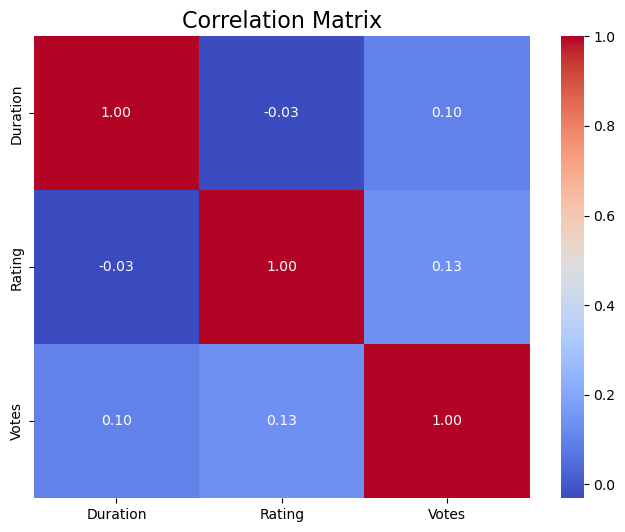

In [20]:
numerical_data = movie[['Duration', 'Rating', 'Votes']]
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=16)
plt.show()

# Train-test split

In [22]:
movie['High_Rated'] = (movie['Rating'] >= 7).astype(int)  

X = movie[['Duration', 'Votes']]  
y = movie['High_Rated']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model

Confusion Matrix:
[[1269   18]
 [ 415   54]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.99      0.85      1287
           1       0.75      0.12      0.20       469

    accuracy                           0.75      1756
   macro avg       0.75      0.55      0.53      1756
weighted avg       0.75      0.75      0.68      1756



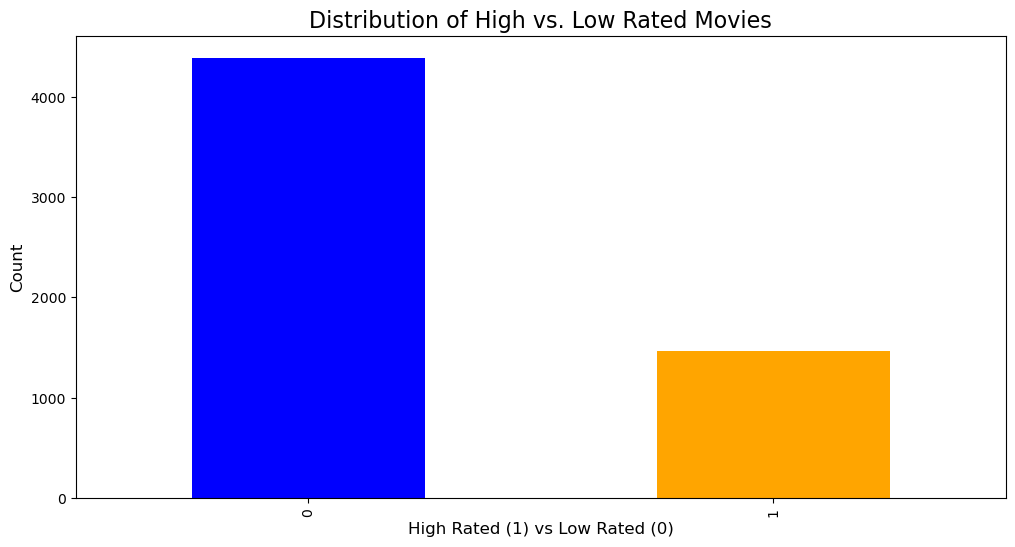

In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)

# Confusion Matrix and Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualization: Distribution of High vs. Low Rated Movies
plt.figure(figsize=(12, 6))
movie['High_Rated'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of High vs. Low Rated Movies', fontsize=16)
plt.xlabel('High Rated (1) vs Low Rated (0)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()